# EMOTION REPORT

We load the files extracted from Pybossa with the annotated data.

In [1]:
from pybossa import *
import pandas as pd

filewithids = 'csv/tweets.csv'

taskjsonpath= 'fsa_task.json'

taskrunjsonpath = 'fsa_task_run.json'

numberofcategories = 7

goldencsvpath = 'csv/Golden.csv'

With these documents we generate the report files executing the function pybossaReport.
This function returns the Fleiss` kappa of the emotion project

In [2]:
# Si no hay golden poner None
pybossaReport(filewithids, taskjsonpath, taskrunjsonpath, numberofcategories, goldencsvpath)

0.497674635658


Here is presented each user with its Golden trust and Majority trust.

In [3]:
usertweetinfo = pd.read_csv('usertweetinfo.csv', encoding="utf-8")
usertweetinfo2 = usertweetinfo[['User','Golden trust','Majority trust']]
usertweetinfo2[17:19]

,User,Golden trust,Majority trust
17,1,0.888889,0.533084
18,2,0.888889,0.656679


## MAJORITY REPORT
We load the majority report generated in pybossaReport.

In [4]:
majoritypercent = pd.read_csv('./csv/majoritypercent.csv', encoding="utf-8")

majoritypercent[:5]

,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco
0,@AS_Manolete Y con el atleti podemos soñar otr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,@eSports_Barca @MNDZPAU1 Md,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Que venga Arthur me tiene más emocionado que c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Me ha gustado un vídeo de @YouTube (https://t....,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We create the column Emotion with the most chosen answer according to the user`s majority confidence.

In [6]:
majoritypercent['Emotion'] = 0
majoritypercent.loc[majoritypercent["Emotion"] == 0, "Emotion"] = ((majoritypercent.Cólera > majoritypercent.Tristeza) & (majoritypercent.Cólera > majoritypercent.NoEmocion) & (majoritypercent.Cólera > majoritypercent.Felicidad)& (majoritypercent.Cólera > majoritypercent.Sorpresa)& (majoritypercent.Cólera > majoritypercent.Miedo)& (majoritypercent.Cólera > majoritypercent.Asco)).astype(int)
majoritypercent.loc[majoritypercent["Emotion"] == 0, "Emotion"] = ((majoritypercent.Tristeza > majoritypercent.Cólera) & (majoritypercent.Tristeza > majoritypercent.NoEmocion)& (majoritypercent.Tristeza > majoritypercent.Felicidad)& (majoritypercent.Tristeza > majoritypercent.Sorpresa)& (majoritypercent.Tristeza > majoritypercent.Miedo)& (majoritypercent.Tristeza > majoritypercent.Asco)).astype(int)+2 
majoritypercent.loc[majoritypercent["Emotion"] == 2, "Emotion"] = ((majoritypercent.NoEmocion > majoritypercent.Cólera) & (majoritypercent.NoEmocion > majoritypercent.Tristeza)& (majoritypercent.NoEmocion > majoritypercent.Felicidad)& (majoritypercent.NoEmocion > majoritypercent.Sorpresa)& (majoritypercent.NoEmocion > majoritypercent.Miedo)& (majoritypercent.NoEmocion > majoritypercent.Asco)).astype(int)+4 
majoritypercent.loc[majoritypercent["Emotion"] == 4, "Emotion"] = ((majoritypercent.Felicidad > majoritypercent.Cólera) & (majoritypercent.Felicidad > majoritypercent.Tristeza)& (majoritypercent.Felicidad > majoritypercent.NoEmocion)& (majoritypercent.Felicidad > majoritypercent.Sorpresa)& (majoritypercent.Felicidad > majoritypercent.Miedo)& (majoritypercent.Felicidad > majoritypercent.Asco)).astype(int)+6 
majoritypercent.loc[majoritypercent["Emotion"] == 6, "Emotion"] = ((majoritypercent.Sorpresa > majoritypercent.Cólera) & (majoritypercent.Sorpresa > majoritypercent.Tristeza)& (majoritypercent.Sorpresa > majoritypercent.NoEmocion)& (majoritypercent.Sorpresa > majoritypercent.Felicidad)& (majoritypercent.Sorpresa > majoritypercent.Miedo)& (majoritypercent.Sorpresa > majoritypercent.Asco)).astype(int)+8 
majoritypercent.loc[majoritypercent["Emotion"] == 8, "Emotion"] = ((majoritypercent.Miedo > majoritypercent.Cólera) & (majoritypercent.Miedo > majoritypercent.Tristeza)& (majoritypercent.Miedo > majoritypercent.NoEmocion)& (majoritypercent.Miedo > majoritypercent.Felicidad)& (majoritypercent.Miedo > majoritypercent.Sorpresa)& (majoritypercent.Miedo > majoritypercent.Asco)).astype(int)+10 

majoritypercent.loc[majoritypercent["Emotion"] == 1, "Emotion"] = "Anger"
majoritypercent.loc[majoritypercent["Emotion"] == 3, "Emotion"] = "Sadness"
majoritypercent.loc[majoritypercent["Emotion"] == 5, "Emotion"] = "NoEmotion"
majoritypercent.loc[majoritypercent["Emotion"] == 7, "Emotion"] = "Happiness"
majoritypercent.loc[majoritypercent["Emotion"] == 9, "Emotion"] = "Surprise"
majoritypercent.loc[majoritypercent["Emotion"] == 10, "Emotion"] = "Disgust"
majoritypercent.loc[majoritypercent["Emotion"] == 11, "Emotion"] = "Fear"

majoritypercent[:10]

,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco,Emotion
0,@AS_Manolete Y con el atleti podemos soñar otr...,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Anger
1,@eSports_Barca @MNDZPAU1 Md,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,NoEmotion
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,NoEmotion
3,Que venga Arthur me tiene más emocionado que c...,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,Happiness
4,Me ha gustado un vídeo de @YouTube (https://t....,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,Happiness
5,La 'rajada' de un ex objetivo del Barça sobre ...,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Anger
6,"#Deportes ➡️ Hace 17 años, Messi por primera v...",0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,Happiness
7,@marcmarquez93 @3gerardpique @SergiRoberto10 @...,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,Anger
8,Gerard Piqué confirma la primera fuga sonada d...,0.000000,0.0,1.000000,0.0,0.0,0.0,0.0,NoEmotion
9,Sin embargo el balance de Ligas va ser 3-1 par...,0.448059,0.0,0.551941,0.0,0.0,0.0,0.0,NoEmotion


We create the column FullAgreement to identify in which tweets it has been full agreement in the chosen answer.

In [8]:
majoritypercent['FullAgreement']=0
majoritypercent.FullAgreement = ((majoritypercent.Tristeza == 1) | (majoritypercent.Cólera == 1) | (majoritypercent.NoEmocion == 1) | (majoritypercent.Asco == 1) | (majoritypercent.Miedo == 1) | (majoritypercent.Sorpresa == 1) | (majoritypercent.Felicidad == 1)).astype(int)
majoritypercent[:5]

,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco,Emotion,FullAgreement
0,@AS_Manolete Y con el atleti podemos soñar otr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Anger,1
1,@eSports_Barca @MNDZPAU1 Md,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion,1
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion,1
3,Que venga Arthur me tiene más emocionado que c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness,1
4,Me ha gustado un vídeo de @YouTube (https://t....,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness,1


These are the columns we are interested for the emotion golden report.

In [9]:
majority1 = majoritypercent[['Tweet','Felicidad','Tristeza','Cólera','Asco','Miedo','Sorpresa','NoEmocion','Emotion','FullAgreement']]
majority1[:5]

,Tweet,Felicidad,Tristeza,Cólera,Asco,Miedo,Sorpresa,NoEmocion,Emotion,FullAgreement
0,@AS_Manolete Y con el atleti podemos soñar otr...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Anger,1
1,@eSports_Barca @MNDZPAU1 Md,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NoEmotion,1
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NoEmotion,1
3,Que venga Arthur me tiene más emocionado que c...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Happiness,1
4,Me ha gustado un vídeo de @YouTube (https://t....,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Happiness,1


The number of tweets where it has been full agreement

In [10]:
import seaborn as sns
majority1.groupby('FullAgreement').size()

FullAgreement
0    291
1    510
dtype: int64

Full agreement graphic.

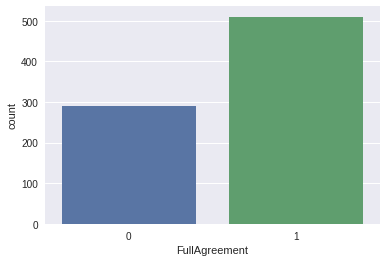

In [11]:
sns.countplot('FullAgreement', data=majority1)

The number of chosen answers.

In [12]:
majority1.groupby('Emotion').size()

Emotion
Anger        105
Disgust       53
Fear           9
Happiness    158
NoEmotion    341
Sadness       87
Surprise      48
dtype: int64

Chosen answers graphic.

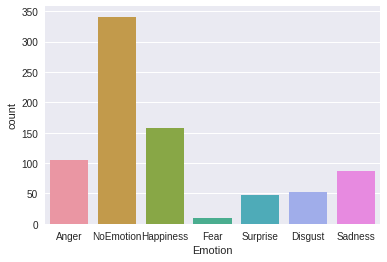

In [13]:
sns.countplot('Emotion', data=majority1)

## GOLDEN REPORT
We load the golden report generated in pybossaReport.

In [14]:
goldenpercent = pd.read_csv('goldenpercent.csv', encoding="utf-8")
goldenpercent[:5]

,id_str,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.0,0.0,0.0,1.0,0.0,0.0,0.0


We create the column Emotion with the most chosen answer according to the user`s golden confidence.

In [15]:
goldenpercent['Emotion'] = 0
goldenpercent.loc[goldenpercent["Emotion"] == 0, "Emotion"] = ((goldenpercent.Cólera > goldenpercent.Tristeza) & (goldenpercent.Cólera > goldenpercent.NoEmocion) & (goldenpercent.Cólera > goldenpercent.Felicidad)& (goldenpercent.Cólera > goldenpercent.Sorpresa)& (goldenpercent.Cólera > goldenpercent.Miedo)& (goldenpercent.Cólera > goldenpercent.Asco)).astype(int)
goldenpercent.loc[goldenpercent["Emotion"] == 0, "Emotion"] = ((goldenpercent.Tristeza > goldenpercent.Cólera) & (goldenpercent.Tristeza > goldenpercent.NoEmocion)& (goldenpercent.Tristeza > goldenpercent.Felicidad)& (goldenpercent.Tristeza > goldenpercent.Sorpresa)& (goldenpercent.Tristeza > goldenpercent.Miedo)& (goldenpercent.Tristeza > goldenpercent.Asco)).astype(int)+2 
goldenpercent.loc[goldenpercent["Emotion"] == 2, "Emotion"] = ((goldenpercent.NoEmocion > goldenpercent.Cólera) & (goldenpercent.NoEmocion > goldenpercent.Tristeza)& (goldenpercent.NoEmocion > goldenpercent.Felicidad)& (goldenpercent.NoEmocion > goldenpercent.Sorpresa)& (goldenpercent.NoEmocion > goldenpercent.Miedo)& (goldenpercent.NoEmocion > goldenpercent.Asco)).astype(int)+4 
goldenpercent.loc[goldenpercent["Emotion"] == 4, "Emotion"] = ((goldenpercent.Felicidad > goldenpercent.Cólera) & (goldenpercent.Felicidad > goldenpercent.Tristeza)& (goldenpercent.Felicidad > goldenpercent.NoEmocion)& (goldenpercent.Felicidad > goldenpercent.Sorpresa)& (goldenpercent.Felicidad > goldenpercent.Miedo)& (goldenpercent.Felicidad > goldenpercent.Asco)).astype(int)+6 
goldenpercent.loc[goldenpercent["Emotion"] == 6, "Emotion"] = ((goldenpercent.Sorpresa > goldenpercent.Cólera) & (goldenpercent.Sorpresa > goldenpercent.Tristeza)& (goldenpercent.Sorpresa > goldenpercent.NoEmocion)& (goldenpercent.Sorpresa > goldenpercent.Felicidad)& (goldenpercent.Sorpresa > goldenpercent.Miedo)& (goldenpercent.Sorpresa > goldenpercent.Asco)).astype(int)+8 
goldenpercent.loc[goldenpercent["Emotion"] == 8, "Emotion"] = ((goldenpercent.Miedo > goldenpercent.Cólera) & (goldenpercent.Miedo > goldenpercent.Tristeza)& (goldenpercent.Miedo > goldenpercent.NoEmocion)& (goldenpercent.Miedo > goldenpercent.Felicidad)& (goldenpercent.Miedo > goldenpercent.Sorpresa)& (goldenpercent.Miedo > goldenpercent.Asco)).astype(int)+10 

goldenpercent.loc[goldenpercent["Emotion"] == 1, "Emotion"] = "Anger"
goldenpercent.loc[goldenpercent["Emotion"] == 3, "Emotion"] = "Sadness"
goldenpercent.loc[goldenpercent["Emotion"] == 5, "Emotion"] = "NoEmotion"
goldenpercent.loc[goldenpercent["Emotion"] == 7, "Emotion"] = "Happiness"
goldenpercent.loc[goldenpercent["Emotion"] == 9, "Emotion"] = "Surprise"
goldenpercent.loc[goldenpercent["Emotion"] == 10, "Emotion"] = "Disgust"
goldenpercent.loc[goldenpercent["Emotion"] == 11, "Emotion"] = "Fear"

goldenpercent[:10]

,id_str,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco,Emotion
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Anger
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness
5,"9,71413947961299E+017",La 'rajada' de un ex objetivo del Barça sobre ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Anger
6,"9,71413939962528E+017","#Deportes ➡️ Hace 17 años, Messi por primera v...",0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness
7,"9,71413833544815E+017",@marcmarquez93 @3gerardpique @SergiRoberto10 @...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Anger
8,"9,7141371484185E+017",Gerard Piqué confirma la primera fuga sonada d...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion
9,"9,71413713415746E+017",Sin embargo el balance de Ligas va ser 3-1 par...,0.5,0.0,0.5,0.0,0.0,0.0,0.0,Disgust


We create the column FullAgreement to identify in which tweets it has been full agreement in the chosen answer.

In [17]:
goldenpercent['FullAgreement']=0
goldenpercent.FullAgreement = ((goldenpercent.Tristeza == 1) | (goldenpercent.Cólera == 1) | (goldenpercent.NoEmocion == 1) | (goldenpercent.Asco == 1) | (goldenpercent.Miedo == 1) | (goldenpercent.Sorpresa == 1) | (goldenpercent.Felicidad == 1)).astype(int)
goldenpercent[:5]

,id_str,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco,Emotion,FullAgreement
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Anger,1
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion,1
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion,1
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness,1
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness,1


These are the columns we are interested for the sentiment golden report.

In [19]:

goldenpercent['FullAgreement']=0
goldenpercent.FullAgreement = ((goldenpercent.Tristeza == 1) | (goldenpercent.Cólera == 1) | (goldenpercent.NoEmocion == 1) | (goldenpercent.Asco == 1) | (goldenpercent.Miedo == 1) | (goldenpercent.Sorpresa == 1) | (goldenpercent.Felicidad == 1)).astype(int)
goldenpercent[:5]

,id_str,Tweet,Cólera,Tristeza,NoEmocion,Felicidad,Sorpresa,Miedo,Asco,Emotion,FullAgreement
0,"9,71414330725069E+017",@AS_Manolete Y con el atleti podemos soñar otr...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Anger,1
1,"9,71414177666478E+017",@eSports_Barca @MNDZPAU1 Md,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion,1
2,"9,71414161606501E+017",Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NoEmotion,1
3,"9,71414116270305E+017",Que venga Arthur me tiene más emocionado que c...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness,1
4,"9,7141400299889E+017",Me ha gustado un vídeo de @YouTube (https://t....,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Happiness,1


These are the columns we are interested for the emotion golden report.

In [20]:
goldenpercent1 = goldenpercent[['Tweet','Felicidad','Tristeza','Cólera','Asco','Miedo','Sorpresa','NoEmocion','Emotion','FullAgreement']]
goldenpercent1[:5]

,Tweet,Felicidad,Tristeza,Cólera,Asco,Miedo,Sorpresa,NoEmocion,Emotion,FullAgreement
0,@AS_Manolete Y con el atleti podemos soñar otr...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Anger,1
1,@eSports_Barca @MNDZPAU1 Md,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NoEmotion,1
2,Ahhhh claro que es del Atleti https://t.co/xm4...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NoEmotion,1
3,Que venga Arthur me tiene más emocionado que c...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Happiness,1
4,Me ha gustado un vídeo de @YouTube (https://t....,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Happiness,1


The number of tweets where it has been full agreement.

In [21]:
goldenpercent.groupby('FullAgreement').size()

FullAgreement
0    291
1    510
dtype: int64

Full agreement graphic.

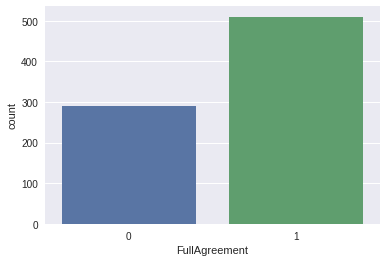

In [22]:
sns.countplot('FullAgreement', data=goldenpercent1)

The number of chosen answers.

In [23]:
goldenpercent1.groupby('Emotion').size()

Emotion
Anger         48
Disgust      324
Fear           5
Happiness     85
NoEmotion    298
Sadness       27
Surprise      14
dtype: int64

Chosen agreement graphic.

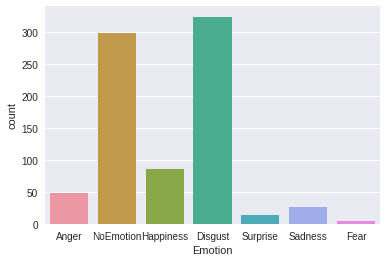

In [24]:
sns.countplot('Emotion', data=goldenpercent1)